In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_df=pd.read_csv('//kaggle//input//house-prices-advanced-regression-techniques//train.csv')
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
print(train_df.shape)
test_df.shape

(1460, 81)


(1459, 80)

In [8]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:

missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]


r = missing_values.sort_values(ascending=False)
print(r)



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [11]:
train_df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [12]:
train_df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [13]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
numeric_cols = train_df.select_dtypes(include=['int64','float64']).columns
categorical_cols=categorical_cols.drop('Electrical')
numeric_cols=numeric_cols.drop('MasVnrArea','LotFrontage ')

In [14]:

for col in categorical_cols:
    train_df[col] = train_df[col].fillna('None')

In [15]:

for col in numeric_cols:
    train_df[col] = train_df[col].fillna(0)

In [16]:
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0],inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(),inplace=True)



In [17]:
r=train_df.isnull().sum()
r=r[r>0]
r

Series([], dtype: int64)

In [18]:
e=test_df.isnull().sum()
e=e[e>0]
e

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [19]:
for col in categorical_cols:
    test_df[col] = test_df[col].fillna('None')




In [20]:
numeric_colss = test_df.select_dtypes(include=['int64','float64']).columns
numeric_colss.drop('MasVnrArea')
for col in numeric_colss:
    test_df[col] = test_df[col].fillna(0)

In [21]:
test_df['Electrical'].fillna(train_df['Electrical'].mode()[0],inplace=True)
test_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(),inplace=True)

In [22]:
w=test_df.isnull().sum()
w=w[w==0]
print(w)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [23]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [24]:
train_id=train_df['Id']
test_id=test_df['Id']
y_train=train_df['SalePrice']
train_df.drop(columns=['Id','SalePrice'],inplace=True)
test_df.drop(columns=['Id'],inplace=True)
train_df['is_train']=1
test_df['is_train']=0

In [25]:
all_data=pd.concat((train_df,test_df)).reset_index(drop=True)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,is_train
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,1
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,1
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,1
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,1


In [26]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [27]:

all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

all_data['RecentRemodel'] = (all_data['YearRemodAdd'] == all_data['YearBuilt']).astype(int)

all_data['NewHouse'] = (all_data['YearBuilt'] == all_data['YrSold']).astype(int)

all_data['OverallQual_x_GrLivArea'] = all_data['OverallQual'] * all_data['GrLivArea']
all_data['OverallQual_x_HouseAge'] = all_data['OverallQual'] * (all_data['YrSold'] - all_data['YearBuilt'])

In [28]:

encoded=pd.get_dummies(all_data)

In [29]:
x_train=encoded[encoded['is_train']==1]
x_test=encoded[encoded['is_train']==0]
x_train=x_train.drop(columns=['is_train'])
x_test=x_test.drop(columns=['is_train'])

In [30]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False


<Axes: xlabel='SalePrice', ylabel='Count'>

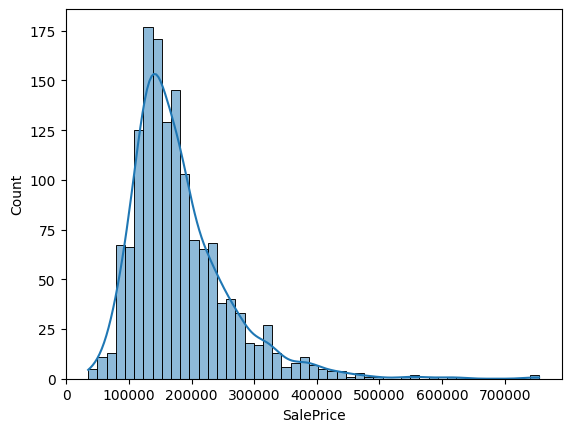

In [31]:
sns.histplot(y_train,kde=True)

In [32]:
import numpy as np

<Axes: xlabel='SalePrice', ylabel='Count'>

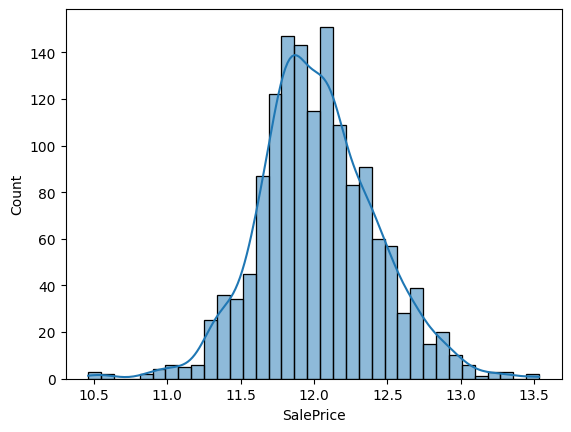

In [33]:
y_train=np.log1p(y_train)
sns.histplot(y_train,kde=True)

In [34]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [35]:

param = {
    'n_estimators': [100, 200, 500, 1000],
    
    'max_depth': [10, 20, 30, None],
    
   
    'min_samples_split': [2, 5, 10],
    
   
    'min_samples_leaf': [1, 2, 4],
    
   
    'max_features': ['sqrt', 'log2', 0.5] 
}





rf_base = RandomForestRegressor(random_state=42)


random_search = RandomizedSearchCV(estimator=rf_base,
                                   param_distributions=param,
                                   n_iter=20, 
                                   cv=6, 
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring='neg_mean_squared_error')

In [36]:
random_search.fit(x_train,y_train)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:

best_rmse = np.sqrt(-random_search.best_score_)
print(best_rmse)

0.13693472092270303


In [38]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
import numpy as np
def objective(space):

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        learning_rate=space['learning_rate'],
        gamma=space['gamma'],
        min_child_weight=int(space['min_child_weight']),
        subsample=space['subsample'],
        colsample_bytree=space['colsample_bytree'],
        random_state=42,
        n_jobs=-1
    )
    
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    

    loss = -score 

    return {'loss': loss, 'status': STATUS_OK}
space = {
    'n_estimators': hp.quniform('n_estimators', 500, 2000, 100),   
    'max_depth': hp.quniform('max_depth', 3, 10, 1),              
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),      
    'gamma': hp.uniform('gamma', 0, 0.5),                        
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),   
    'subsample': hp.uniform('subsample', 0.7, 1.0),               
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0)     
}

trials = Trials()

print("Starting Bayesian Optimization for XGBoost...")

best_hyperparams = fmin(fn=objective,
                        space=space,
                        algo=tpe.suggest,
                        max_evals=50,    # Number of different hyperparameter sets to try
                        trials=trials)
print("...Optimization complete!")




# The 'trials' object has recorded the loss (MSE) for every run.
# '.best_trial' gives us the result from the iteration with the lowest loss.
best_mse = trials.best_trial['result']['loss']

# The RMSE is the square root of the MSE. This is your final answer.
best_rmse = np.sqrt(best_mse)
print(f"The Best Cross-Validated RMSE found was: {best_rmse:.5f}")




Starting Bayesian Optimization for XGBoost...
100%|██████████| 50/50 [03:26<00:00,  4.14s/trial, best loss: 0.015062654793353853]
...Optimization complete!
The Best Cross-Validated RMSE found was: 0.12273


Creating the final model with the best hyperparameters...
Training the final model...
...Training complete!

--- Top 20 Most Important Features from Tuned XGBoost ---
                     Feature  Importance
39   OverallQual_x_GrLivArea    0.137413
3                OverallQual    0.113804
25                GarageCars    0.043506
232             CentralAir_N    0.042072
255         FireplaceQu_None    0.040419
180             ExterQual_TA    0.030620
192              BsmtQual_Ex    0.029866
46               MSZoning_RM    0.024530
259        GarageType_Attchd    0.023802
23                Fireplaces    0.021380
5                  YearBuilt    0.018922
243           KitchenQual_TA    0.018703
11               TotalBsmtSF    0.017267
268         GarageFinish_Unf    0.015163
274            GarageQual_TA    0.014129
263        GarageType_Detchd    0.013203
45               MSZoning_RL    0.013111
6               YearRemodAdd    0.012052
186        Foundation_BrkTil    0.011982
233          

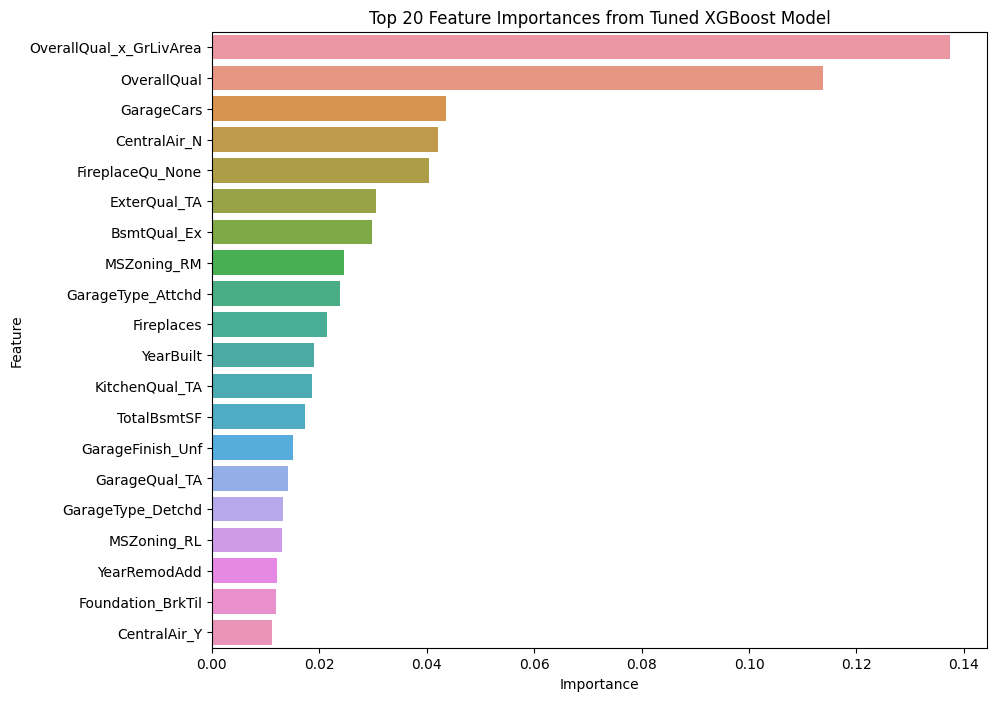

In [39]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CREATE THE FINAL MODEL INSTANCE ---
# Use the 'best_hyperparams' dictionary you just found from your search.
# We must convert some values from float to int, as XGBoost expects.
print("Creating the final model with the best hyperparameters...")
final_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=int(best_hyperparams['n_estimators']),
    max_depth=int(best_hyperparams['max_depth']),
    learning_rate=best_hyperparams['learning_rate'],
    gamma=best_hyperparams['gamma'],
    min_child_weight=int(best_hyperparams['min_child_weight']),
    subsample=best_hyperparams['subsample'],
    colsample_bytree=best_hyperparams['colsample_bytree'],
    random_state=42,
    n_jobs=-1
)

# --- 2. TRAIN THE FINAL MODEL ---
# Now we train this model on ALL of our training data.
# I'm using your variable names 'x_train' and 'y_train'.
# Double-check that 'y_train' is your log-transformed SalePrice!
print("Training the final model...")
final_model.fit(x_train, y_train)
print("...Training complete!")


# --- 3. GET AND DISPLAY FEATURE IMPORTANCE (This is your goal) ---
# Now that 'final_model' exists and is trained, this will work.
print("\n--- Top 20 Most Important Features from Tuned XGBoost ---")

importances = final_model.feature_importances_
feature_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Sort the features by importance
feature_df_sorted = feature_df.sort_values(by='Importance', ascending=False)

# Print the top 20
print(feature_df_sorted.head(20))


# --- 4. (Optional but Recommended) PLOT THE IMPORTANCES ---
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df_sorted.head(20))
plt.title('Top 20 Feature Importances from Tuned XGBoost Model')
plt.show()

In [40]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(final_model, prefit=True, threshold="median") 

# 3. Transform your data
X_train_selected = selector.transform(x_train)
X_test_selected = selector.transform(x_test)



In [41]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
import numpy as np
def objective(space):

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        learning_rate=space['learning_rate'],
        gamma=space['gamma'],
        min_child_weight=int(space['min_child_weight']),
        subsample=space['subsample'],
        colsample_bytree=space['colsample_bytree'],
        random_state=42,
        n_jobs=-1
    )
    
    score = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    

    loss = -score 

    return {'loss': loss, 'status': STATUS_OK}
space = {
    'n_estimators': hp.quniform('n_estimators', 500, 2000, 100),   
    'max_depth': hp.quniform('max_depth', 3, 10, 1),              
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),      
    'gamma': hp.uniform('gamma', 0, 0.5),                        
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),   
    'subsample': hp.uniform('subsample', 0.7, 1.0),               
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0)     
}

trials = Trials()

print("Starting Bayesian Optimization for XGBoost...")

best_hyperparams = fmin(fn=objective,
                        space=space,
                        algo=tpe.suggest,
                        max_evals=50,  
                        trials=trials)
print("...Optimization complete!")


best_mse = trials.best_trial['result']['loss']
best_rmse = np.sqrt(best_mse)
print(f"The Best Cross-Validated RMSE found was: {best_rmse:.5f}")

final_model.fit(X_train_selected, y_train)



Starting Bayesian Optimization for XGBoost...
100%|██████████| 50/50 [01:58<00:00,  2.37s/trial, best loss: 0.015326368916462737]
...Optimization complete!
The Best Cross-Validated RMSE found was: 0.12380


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8541522229137712, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.022306326865364094,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.026963152859992352,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [43]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

import lightgbm as lgb

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1100,
    max_depth=4,
    learning_rate=0.0841, # Using your best result
    gamma=0.0209,
    min_child_weight=4,
    subsample=0.796,
    colsample_bytree=0.73, # A reasonable value, tune if needed
    random_state=42,
    n_jobs=-1
)

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11,
    random_state=42,
    n_jobs=-1
)
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [44]:
meta_model = RidgeCV()

In [45]:
#  Assemble the Stacking Regressor 

# Creating list of our base models
# Using preprocessed features (x_train) is a good start.
# The meta-model will learn which base models are most useful.
base_models = [
    ('xgboost', xgb_model),
    ('lightgbm', lgb_model),
    ('randomforest', rf_model),
    ('ridge', ridge_model) 
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,
    cv=5,
    n_jobs=-1
)


stacking_model.fit(x_train, y_train)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] 

StackingRegressor(cv=5,
                  estimators=[('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.73, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.0209,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,...
                                             min_data_in_leaf=6,
                                             min_sum_hessian_in_leaf=11,
                                             n_estimators=720, n_jobs=-1,
                                             num_leaves=5,
                                             objective='regression',
                                             random_state=42)),
                              ('randomforest',
                               RandomForestRegressor(max_depth=10,
                                                     max_features=0.5,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('ridge',
                               RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5))],
                  final_estimator=RidgeCV(), n_jobs=-1)

In [46]:
stacked_predictions_log = stacking_model.predict(x_test)

#  Reverse the Log Transformation 
stacked_predictions_final = np.expm1(stacked_predictions_log)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [47]:
print("Creating the new submission file")
submission_df = pd.DataFrame({'Id': test_id, 'SalePrice': stacked_predictions_final})
submission_df.to_csv('submission_stacked.csv', index=False)

Creating the new submission file
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  21.2s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  21.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  10.3s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  10.3s
[CV] END max_depth=20, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  22.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[C


The initial tuned XGBoost model provided a strong baseline with a cross-validated RMSE of 0.12273 By applying feature selection based on importance and re-tuning, the score was improved to 0.12380> .
To further reduce the error, a stacking ensemble was implemented, combining the strengths of XGBoost, LightGBM, RandomForest, and a Ridge linear model. This stacked model yielded a cross-validated RMSE of **0.12028.**
The final predictions were generated using the stacking model.